In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_classes=3,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=3,
)

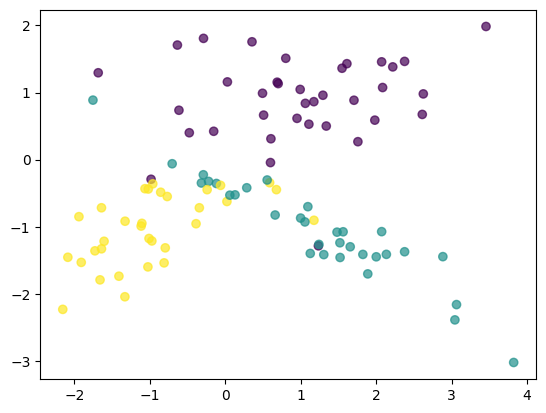

In [ ]:
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y.tolist(),
    alpha=0.7
)

In [ ]:
y

array([0, 1, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2,
       2, 1, 1, 0, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 1, 0, 1, 2, 0,
       0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 2,
       1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2])

In [ ]:
class KNNClassifier:
    def __init__(
        self,
        n : int
    ) -> None:
        self.n = n
        self.X_train = None
        self.y_train = None

    def fit(
        self,
        X_train : np.ndarray,
        y_train : np.ndarray
    ) -> None:

        if len(X_train.shape) != 2:
            raise ValueError('X_train should be 2-dim')
        if len(y_train.shape) != 1:
            raise ValueError('y should be 1-dim')

        self.X_train = X_train
        self.y_train = y_train

    def _distance(
        self,
        x1 : np.ndarray,
        x2 : np.ndarray
    ) -> float:
        return np.sqrt(np.sum((x1 - x2)**2))

    def _get_mode(
        self,
        vals : np.ndarray# [0, 0, 1, 2, 0] -> 0
    ) -> int:
        counter = {}
        for cur in vals:
            if cur in counter:
                counter[cur] += 1
            else:
                counter[cur] = 1
        # {0: 3, 1: 1, 2: 1}
        return max(counter.keys(), key=lambda x: counter[x]) # 0

    def predict(
        self,
        X_test : np.ndarray # [10, 2]
    ) -> np.ndarray:

        if len(X_test.shape) != 2:
            raise ValueError('X_test should be 2-dim')

        predictions = []
        for idx in range(X_test.shape[0]):
            # X_test[idx] = (-2., 7.)
            best_idxs = sorted(
                range(self.X_train.shape[0]), # X_train.shape [5, 2]
                key=lambda cur_train_idx: self._distance(
                    self.X_train[cur_train_idx],
                    X_test[idx]
                )
            )[:self.n]
            predictions.append(self._get_mode(self.y_train[best_idxs]))
        return np.asarray(predictions)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=3)

In [ ]:
model = KNNClassifier(n=4)
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [ ]:
preds, y_test

(array([0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 2, 1]),
 array([1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 2, 1]))

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"F-1: {f1_score(y_test, preds, average='macro')}")

Accuracy: 0.95
F-1: 0.9500891265597148


In [ ]:
model_sklearn = KNeighborsClassifier(n_neighbors=4)
model_sklearn.fit(X_train, y_train)
preds_sklearn = model_sklearn.predict(X_test)

In [ ]:
preds_sklearn, y_test

(array([0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 2, 1]),
 array([1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 2, 1]))

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, preds_sklearn)}")
print(f"F-1: {f1_score(y_test, preds_sklearn, average='macro')}")

Accuracy: 0.95
F-1: 0.9500891265597148


###Оптимизация n

In [ ]:
n_range = np.arange(1, 20)
test_acc = []
for cur_n in n_range:
    model = KNNClassifier(n=cur_n)
    model.fit(X_train, y_train)
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

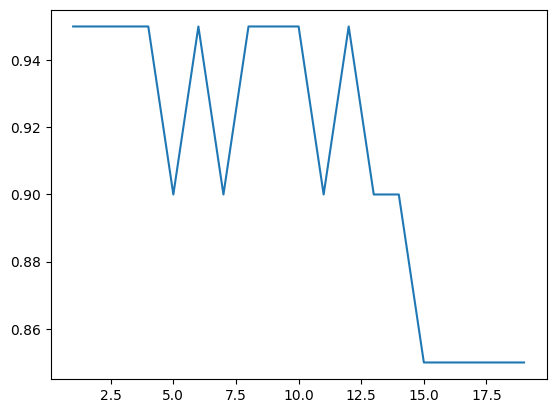

In [ ]:
plt.plot(n_range, test_acc)